### Integración y validación de datos

In [1]:
# ----------------------------
# 1. Análisis de Datos y Procesamiento
# ----------------------------
import pandas as pd  # Análisis y manipulación de datos
import numpy as np  # Cálculos numéricos y estadísticas

# ----------------------------
# 2. Tratamiento de fechas y tiempos
import datetime  # Tratamiento de fechas y tiempos
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8') # Configuración de la localización para fechas en español

# ----------------------------
# 3. Interaccion con el sistema operativo
# ----------------------------
import sys  # Interacción conda-forge
import os  # Interacción con el sistema operativo

# ----------------------------
# 5. Visualización de datos
# ----------------------------
import seaborn as sns  # Visualización de datos
import matplotlib.pyplot as plt # Visualización de datos    
from scipy.stats import gaussian_kde    # Funciones para la visualización de datos
from sklearn.linear_model import LogisticRegression
from scipy.stats import pearsonr



# ----------------------------
# 4. Funciones genericas para la limpiez y trasformación de datos
# ----------------------------
import data_utils as du     # Funciones para la limpieza y transformación de datos 


In [2]:
# ----------------------------
# carga de datos
# ----------------------------
# Cargar los archivos CSV limpios en un DataFrame de pandas


df_bank_additional = pd.read_pickle('../Data/bank_additional_limpio.plk')

df_customer = pd.read_pickle('../data/customer_details_limpio.plk')


# Hacemos el merge:
df_merged = pd.merge(
    df_bank_additional,
    df_customer,
    left_index=True,       # conserva el índice de df_bank_additional
    right_on='ID',
    how='inner',           # o 'left'/'outer' según necesites
    suffixes=('_bank','_cust'),
    indicator=True
)

# 1. Tamaño del resultado
print("Filas tras merge:", df_merged.shape[0])

# 2. Estadísticas de coincidencia
print(df_merged['_merge'].value_counts())

# 3. (Opcional) Filas de bank_additional sin match:
sin_match = df_merged[df_merged['_merge']=='left_only']
print("No casaron en customer:", sin_match.shape[0])

# 4. (Opcional) Filas de customer sin match:
sin_match_cust = df_merged[df_merged['_merge']=='right_only']
print("No casaron en bank_additional:", sin_match_cust.shape[0])

Filas tras merge: 43000
_merge
both          43000
left_only         0
right_only        0
Name: count, dtype: int64
No casaron en customer: 0
No casaron en bank_additional: 0


In [3]:
df_merged.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,longitude,contact_year,contact_month,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,year,_merge
ID,,,,,,,,,,,,,,,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,31,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,-71.233,2019,8,161770,1,0,2012-04-04,29,2012,both
e9d37224-cb6f-4942-98d7-46672963d097,57,services,MARRIED,high.school,Desconocido,0.0,0.0,telephone,149,1,...,-83.923,2016,9,85477,1,1,2012-12-30,7,2012,both
3f9f49b5-e410-4948-bf6e-f9244f04918b,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,-94.847,2019,2,147233,1,1,2012-02-02,5,2012,both
9991fafb-4447-451a-8be2-b0df6098d13e,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,-70.308,2015,11,121393,1,2,2012-12-21,29,2012,both
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,-104.463,2017,1,63164,1,2,2012-06-20,20,2012,both


In [4]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 089b39d8-e4d0-461b-87d4-814d71e0e079 to 993bbbd6-4dbc-4a40-a408-f91f8462bee6
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                43000 non-null  Int64         
 1   job                43000 non-null  object        
 2   marital            43000 non-null  object        
 3   education          43000 non-null  object        
 4   default            43000 non-null  category      
 5   housing            43000 non-null  category      
 6   loan               43000 non-null  category      
 7   contact            43000 non-null  object        
 8   duration           43000 non-null  int64         
 9   campaign           43000 non-null  Int64         
 10  pdays              43000 non-null  Int64         
 11  previous           43000 non-null  Int64         
 12  poutcome           43000 non-null  object        
 13  

In [5]:
# Eliminar la columna innecesaria "_merge"
if "_merge" in df_bank_additional.columns:
    df_bank_additional = df_bank_additional.drop(columns=["_merge"])

In [6]:
# nulos del dataframe
print("Nulos en el dataframe:", df_merged.isnull().sum().sum())

Nulos en el dataframe: 248


In [7]:
columnas_nan = du.verificar_columnas_con_nan(df_merged, df_merged.columns)
print("Columnas con nulos:", columnas_nan) # los nulos estan en las variables date, es correcto

Columna 'age' NO tiene valores NaN.
Columna 'job' NO tiene valores NaN.
Columna 'marital' NO tiene valores NaN.
Columna 'education' NO tiene valores NaN.
Columna 'default' NO tiene valores NaN.
Columna 'housing' NO tiene valores NaN.
Columna 'loan' NO tiene valores NaN.
Columna 'contact' NO tiene valores NaN.
Columna 'duration' NO tiene valores NaN.
Columna 'campaign' NO tiene valores NaN.
Columna 'pdays' NO tiene valores NaN.
Columna 'previous' NO tiene valores NaN.
Columna 'poutcome' NO tiene valores NaN.
Columna 'emp.var.rate' NO tiene valores NaN.
Columna 'cons.price.idx' NO tiene valores NaN.
Columna 'cons.conf.idx' NO tiene valores NaN.
Columna 'euribor3m' NO tiene valores NaN.
Columna 'nr.employed' NO tiene valores NaN.
Columna 'y' NO tiene valores NaN.
Columna 'date' SI tiene valores NaN.
Columna 'latitude' NO tiene valores NaN.
Columna 'longitude' NO tiene valores NaN.
Columna 'contact_year' NO tiene valores NaN.
Columna 'contact_month' NO tiene valores NaN.
Columna 'Income' N

In [8]:
# comprobar duplicados sobre la clave primaria
hay_duplicados = df_merged.duplicated().any()

print("Duplicados en el dataframe:", hay_duplicados)
# si hay duplicados, los eliminamos

Duplicados en el dataframe: False


### Análisis exploratorio univariado

In [9]:
df_customer= df_merged.copy()

In [10]:
import inspect 
funciones = [
    nombre for nombre, obj in inspect.getmembers(du, inspect.isfunction)
    if obj.__module__ == du.__name__
]

print("Funciones definidas en data_utils.py:")
for fn in funciones:
    print(f" - {fn}")

Funciones definidas en data_utils.py:
 - convertir_columnas_a_datetime
 - estadisticas_personalizadas
 - imputar_nulos_por_distribucion
 - listar_outliers_y_boxplot
 - normalize_date
 - plot_categorical_histograms
 - plot_hist_with_mean_and_kde
 - robust_scale_duration
 - verificar_columnas_con_nan


In [11]:
# Estadísticas de la variable numéricas
# Identificación de las principales variables numericas que serán atributos principales para el conjunto de datos
    # Para identificar cuáles de las variables numéricas “principales” (es decir, las que más aportan 
    # variabilidad y, por tanto, más información) nos apoyamos en dos medidas claves:
    #       -   Desviación estándar: cuanto mayor, más dispersión tiene la variable.
    #       -   Rango (max − min) o IQR (75 % − 25 %): dan idea de cuán separadas están sus observaciones.
     
df_estadisticas_numericas = du.estadisticas_personalizadas(df_customer)
df_estadisticas_numericas.head(25)

→ Top 5 variables por DESVIACIÓN ESTÁNDAR:
Income         50498.316
pdays             187.26
duration         135.902
nr.employed       72.337
longitude         16.752
Name: std, dtype: Float64

→ Top 5 variables por RANGO:
Income         174961.0
pdays             999.0
duration          644.0
nr.employed       264.0
longitude         58.06
Name: range, dtype: Float64


,mean,median,std,min,25%,50%,75%,max,range,IQR
age,38.463,36.0,9.403,17.0,31.0,36.0,45.0,68.0,51.0,14.0
duration,201.395,179.0,135.902,0.0,102.0,179.0,264.0,644.0,644.0,162.0
campaign,2.042,2.0,1.242,1.0,1.0,2.0,3.0,6.0,5.0,2.0
pdays,962.331,999.0,187.26,0.0,999.0,999.0,999.0,999.0,999.0,0.0
previous,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
emp.var.rate,0.077,1.1,1.574,-3.4,-1.8,1.1,1.4,1.4,4.8,3.2
cons.price.idx,93.576,93.749,0.577,92.201,93.075,93.749,93.994,94.767,2.566,0.919
cons.conf.idx,-40.509,-41.8,4.637,-50.8,-42.7,-41.8,-36.4,-26.9,23.9,6.3
euribor3m,3.884,4.857,1.621,0.634,1.466,4.857,4.959,5.045,4.411,3.493
nr.employed,5166.836,5191.0,72.337,4964.0,5099.0,5191.0,5228.0,5228.0,264.0,129.0


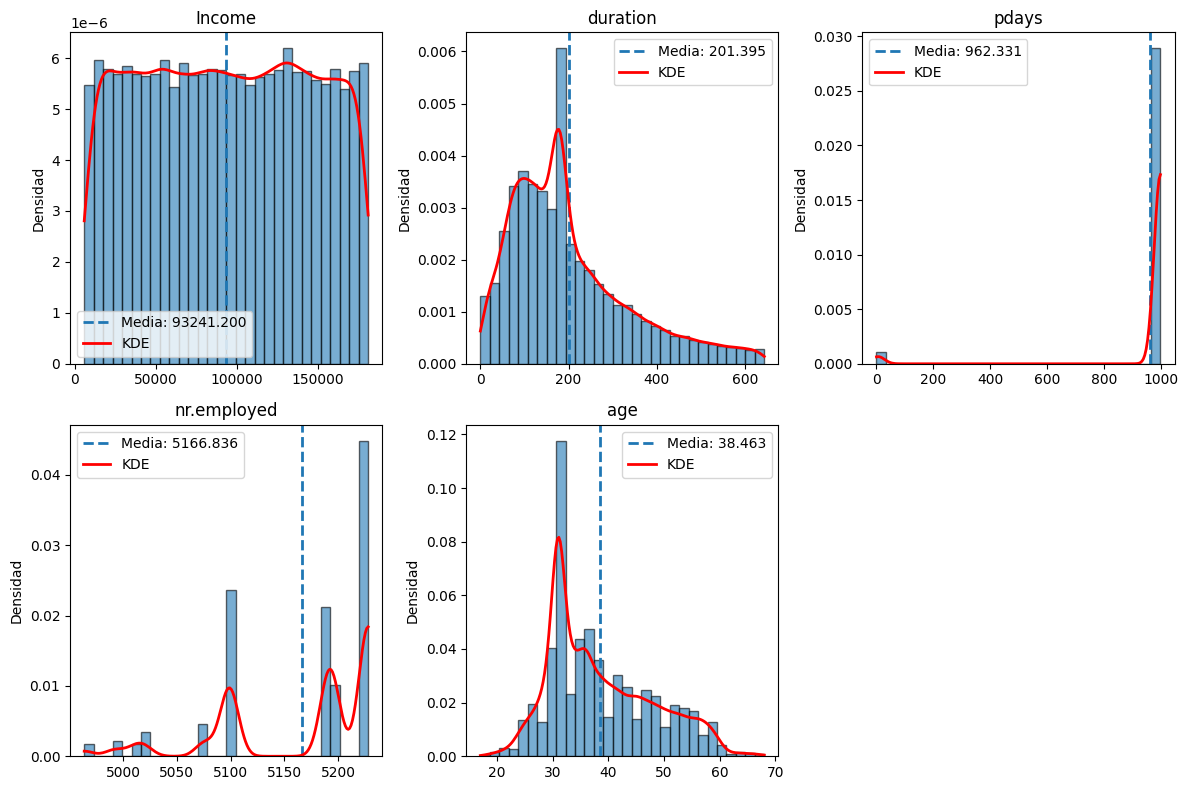

In [12]:
# Visualización de datos de atributos numéricos
# Se visializan los histogramas de las variables numéricas que se han definido como atributos principales 
# para el conjunto de datos
atributos_numericos = ['Income','duration', 'pdays', 'nr.employed', 'age']
du.plot_hist_with_mean_and_kde(df_customer, atributos_numericos)

# Se visualizan los histogramas de las variables numéricas que se han definido como atributos principales

### Análisis univariado categórico

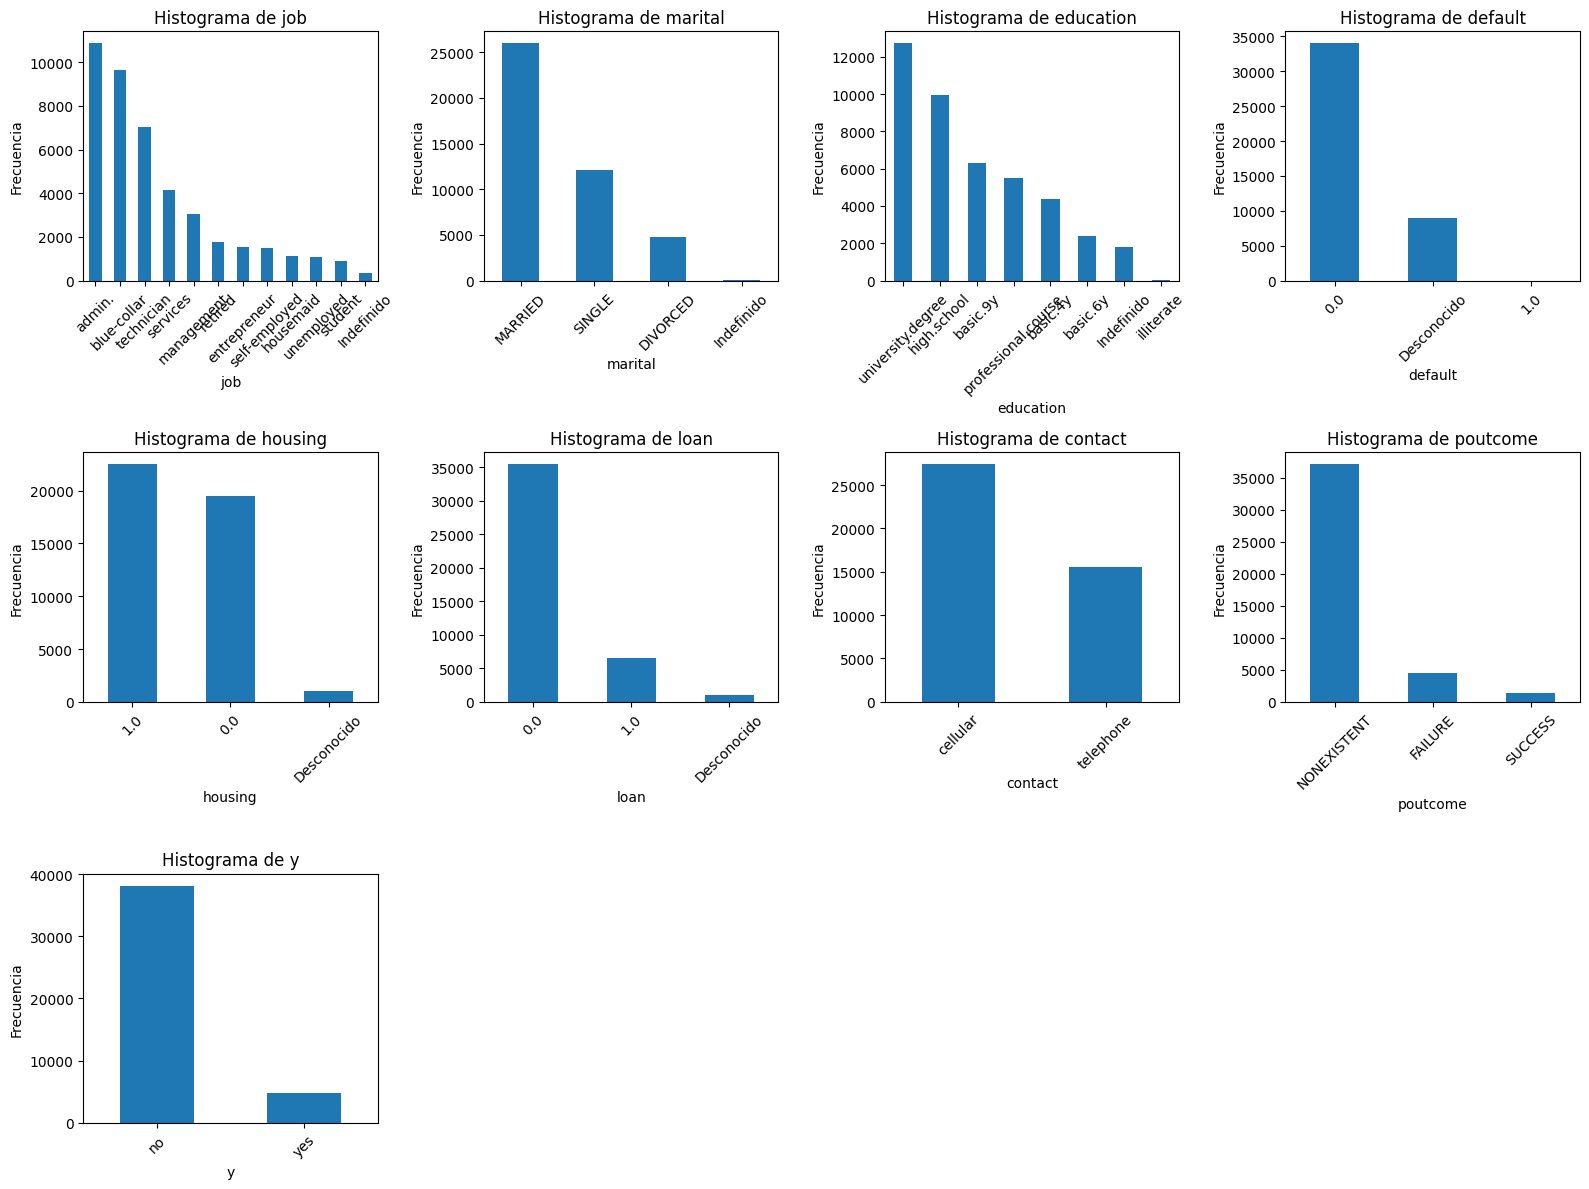

In [13]:
atributos_categoricos = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']

du.plot_categorical_histograms(df_customer, atributos_categoricos)

### Analisis univariado de las variables datetime

Conteo: 42752
Valor mínimo: 2015-01-01 00:00:00
Valor máximo: 2019-12-31 00:00:00
Rango: 1825 days 00:00:00
Percentiles cronológicos:
0% (mínimo): 2015-01-01 00:00:00
25%: 2016-04-01 00:00:00
50% (mediana): 2017-07-04 00:00:00
75%: 2018-10-01 06:00:00
Descripción numérica de cada uno:
count    42752.000000
mean      2017.001310
std          1.414312
min       2015.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64
count    42752.000000
mean         6.502058
std          3.448718
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64
weekday
Friday       6212
Thursday     6198
Sunday       6149
Saturday     6147
Monday       6035
Tuesday      6032
Wednesday    5979
Name: count, dtype: int64


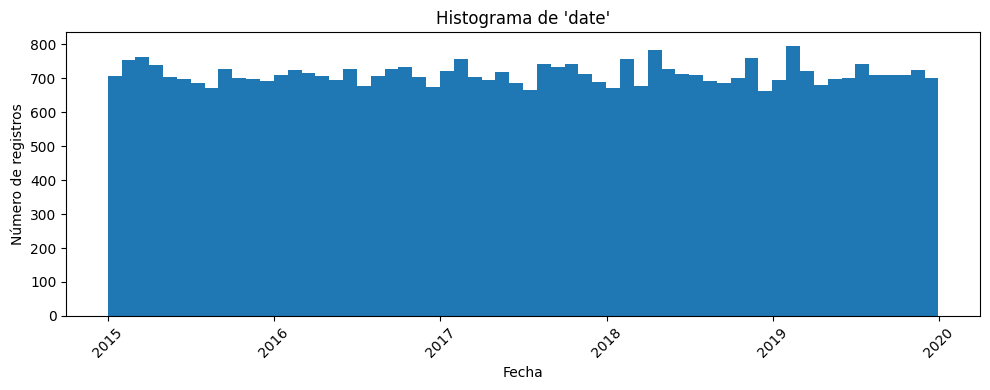

In [14]:
# 1. Asegúrate de que está en formato datetime
df_customer['date'] = pd.to_datetime(df_customer['date'], dayfirst=True, errors='coerce')

# 2. Estadísticas básicas “manuales”
fecha = df_customer['date']
print("Conteo:",      fecha.count())
print("Valor mínimo:", fecha.min())
print("Valor máximo:", fecha.max())
print("Rango:",       fecha.max() - fecha.min())

# 3. Percentiles cronológicos
print("Percentiles cronológicos:")
print("0% (mínimo):", fecha.quantile(0.0))
print("25%:", fecha.quantile(0.25))
print("50% (mediana):", fecha.quantile(0.5))
print("75%:", fecha.quantile(0.75))

# Extraer componentes
df_customer['year']   = fecha.dt.year
df_customer['month']  = fecha.dt.month
df_customer['weekday'] = fecha.dt.day_name()

# Descripción numérica de cada uno
print("Descripción numérica de cada uno:")
print(df_customer['year'].describe())
print(df_customer['month'].describe())
print(df_customer['weekday'].value_counts())

 # Crear histograma
bins = 60

plt.figure(figsize=(10, 4))
plt.hist(df_customer['date'].dropna(), bins=bins)
plt.title("Histograma de 'date'")
plt.xlabel("Fecha")
plt.ylabel("Número de registros")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
    

### Análisis de correlación numérica

In [15]:
df_customer['default'].unique()

['0.0', 'Desconocido', '1.0']
Categories (3, object): ['0.0', '1.0', 'Desconocido']

In [16]:
# ----------------------------------------------------
# Preparaciós de los datos para el análisis de correlación
# ----------------------------------------------------
# 1- Variable principal del analisis de correlación Y (si/No) suscribio servicios con la campaña de marketing
#    para el analisis de correlacción creamos una nueva columna en el dataframe para 'Y' ya que es 
#    una variable categórica relacionada con los servicios de suscripción (Sí/No) como resultado de 
#    la campaña de marketing. si=1, no=0
#
df_correlacion = df_customer.copy()
df_correlacion['y'].unique()
df_correlacion['y_1'] = df_correlacion['y'].map({'yes': 1, 'no': 0})
# Se convierte la columna en numérico
df_correlacion['y_1'] = df_correlacion['y_1'].astype('Int64')

# 2- las variables default, housing y loan son categóricas. se crea una nueva columna tipo numerica 
#    para defaul, housing y loan y se incluyen en el analisis de correlación
df_correlacion['default_1'] = df_correlacion['default'].map({'yes': 1,'no': 0,'desconocido': None})
df_correlacion['housing_1'] = df_correlacion['housing'].map({'yes': 1,'no': 0,'desconocido': None})
df_correlacion['load_1']=df_correlacion['loan'].map({'yes': 1,'no': 0,'desconocido': None})
# se convierten las columnas a integer
df_correlacion['default_1'] = df_correlacion['default_1'].astype('Int64')
df_correlacion['housing_1'] = df_correlacion['housing_1'].astype('Int64')
df_correlacion['load_1'] = df_correlacion['load_1'].astype('Int64')


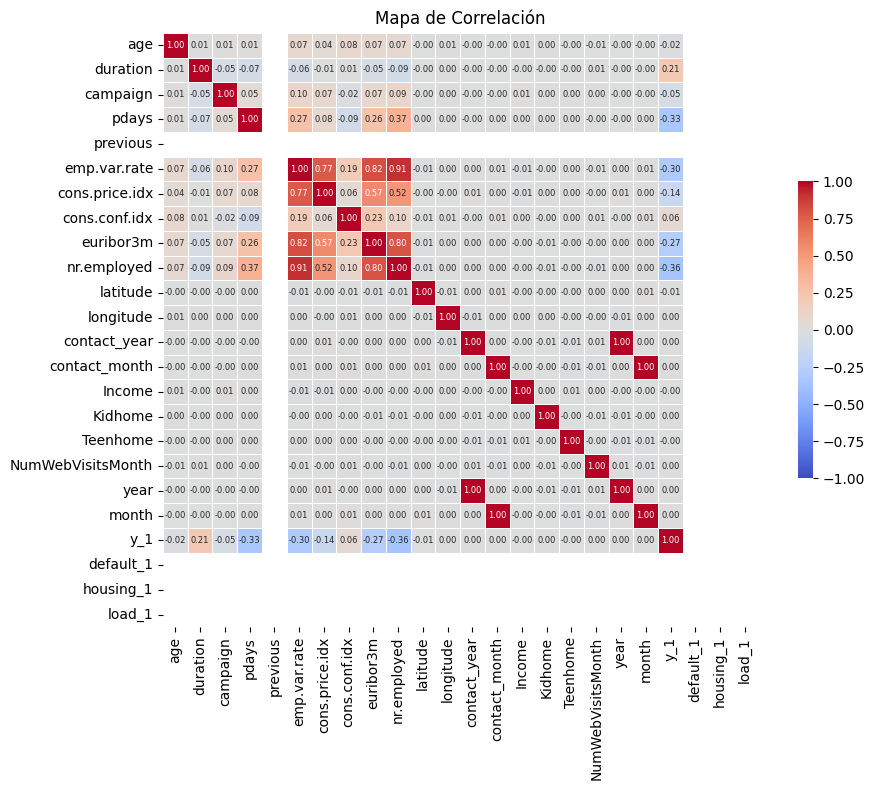

In [17]:
# 1) Selecciono todas las columnas numéricas menos 'plays'
columna_numericas = [
    col for col in df_correlacion.select_dtypes(include=['float64','Int64']).columns
    if col != 'plays'
]

# 2) Relleno los NaN con la media de cada columna
block = df_correlacion[columna_numericas].fillna(df_correlacion[columna_numericas].mean())

# 3) Calculo la matriz de correlaciones
corr = block.corr()

# 4) Creo máscara para ocultar posibles NaN (aunque ya no debería haber)
mask = corr.isnull()

# 5) Pinto el heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt='.2f',
    vmin=-1, vmax=1,
    cmap='coolwarm',
    square=True,
    linewidths=.5,
    annot_kws={"fontsize": 6},     # tamaño de los números en celdas
    cbar_kws={"shrink": 0.5} 
)
plt.title('Mapa de Correlación')
plt.tight_layout()
plt.show()

/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_98408/2446502410.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('age_range')['y_1']
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_98408/2446502410.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


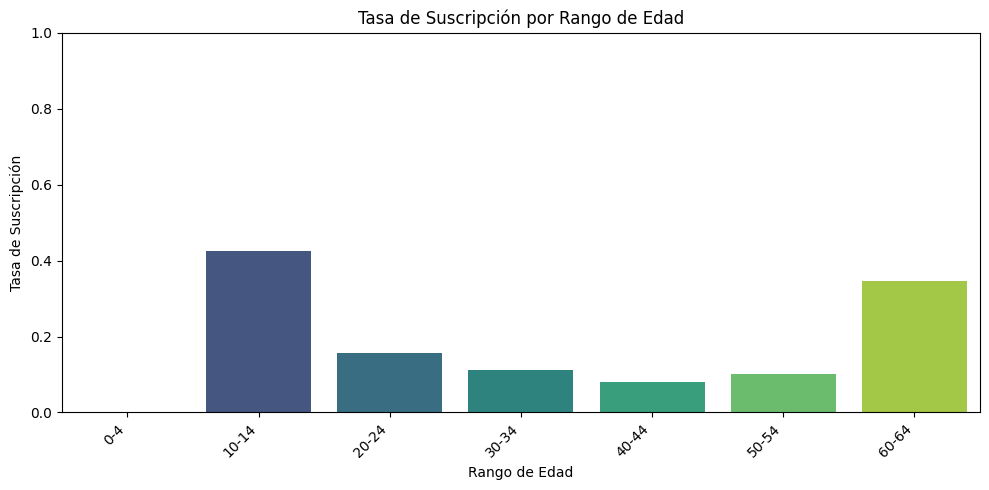

In [18]:
# Segmentación de suscripciones por edad

# Partimos de tu DataFrame con las columnas 'age' y 'y_1' (0/1)
df = df_correlacion.copy()

# 1) Definimos los “bins” de edad (e.g. de 5 en 5 años)
max_age = int(df['age'].max()) + 1
bins = list(range(0, max_age + 10, 10))
labels = [f"{b}-{b+4}" for b in bins[:-1]]

# 2) Creamos la variable categórica de rango de edad
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 3) Calculamos la tasa de suscripción por rango
age_sub_rate = (
    df
    .groupby('age_range')['y_1']
    .mean()
    .reset_index()
    .rename(columns={'y_1': 'subscription_rate'})
)

# 4) Graficamos
plt.figure(figsize=(10,5))
sns.barplot(
    x='age_range',
    y='subscription_rate',
    data=age_sub_rate,
    palette='viridis'
)
plt.ylim(0, 1)
plt.xlabel('Rango de Edad')
plt.ylabel('Tasa de Suscripción')
plt.title('Tasa de Suscripción por Rango de Edad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_98408/69638583.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


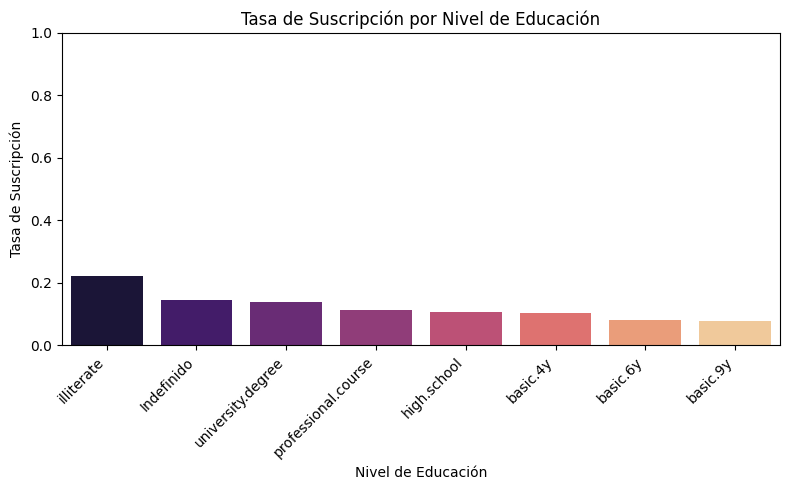

In [19]:
# Segmentación de suscripciones por educación

# 1) Crea una columna numérica 0/1 a partir de y
df = df_customer.copy()
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

# 2) Calcula la tasa de suscripción por nivel de educación
ed_rate = (
    df
    .groupby('education')['y_numeric']
    .mean()                      # ahora funciona, es numérico
    .reset_index()
    .rename(columns={'y_numeric': 'subscription_rate'})
)

# Opcional: ordenar de mayor a menor
ed_rate = ed_rate.sort_values('subscription_rate', ascending=False)

# 3) Dibuja el barplot
plt.figure(figsize=(8,5))
sns.barplot(
    x='education',
    y='subscription_rate',
    data=ed_rate,
    palette='magma'
)
plt.ylim(0, 1)
plt.xlabel('Nivel de Educación')
plt.ylabel('Tasa de Suscripción')
plt.title('Tasa de Suscripción por Nivel de Educación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Correlación Pearson = -0.005


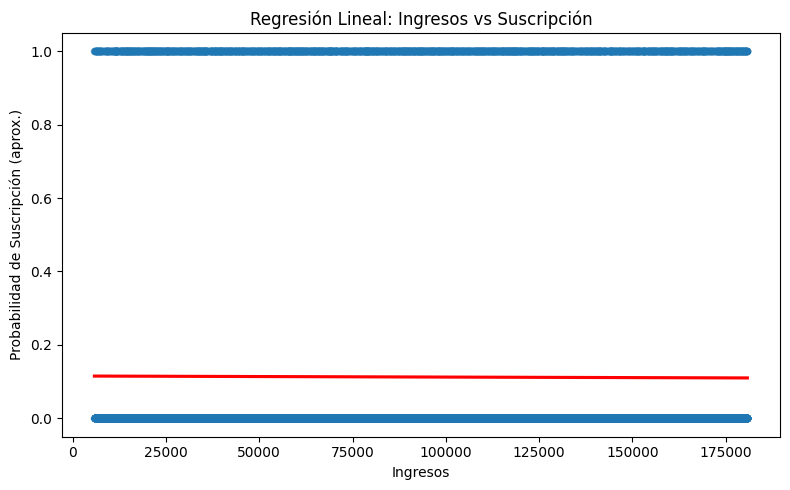

/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_98408/946976311.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


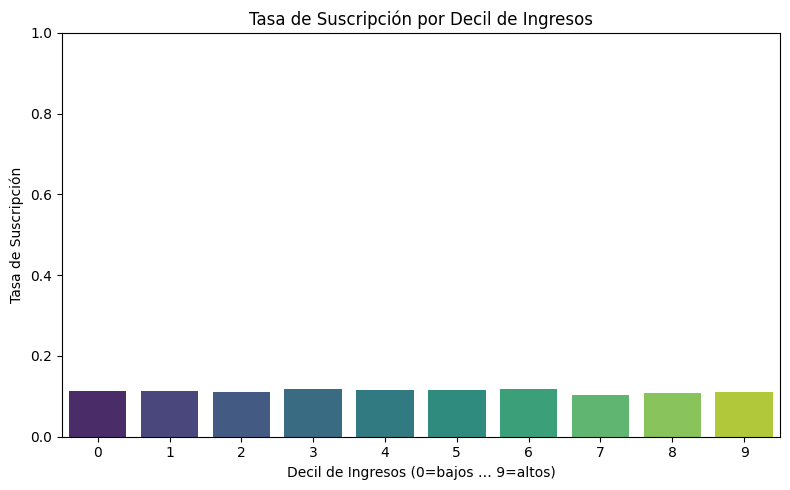

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# — 1) Prepara y mapea y a 0/1 —
df = df_customer.copy()
df['y_numeric'] = df['y'].map({'yes':1, 'no':0})

# Detecta dinámicamente la columna de ingresos
income_col = [c for c in df.columns if c.lower()=='income'][0]

# — 2) Correlación Pearson —
pearson_corr = df[[income_col,'y_numeric']].corr().loc[income_col,'y_numeric']
print(f"Correlación Pearson = {pearson_corr:.3f}")

# — 3) Scatter + línea de regresión lineal —
plt.figure(figsize=(8,5))
sns.regplot(
    x=income_col,
    y='y_numeric',
    data=df,
    scatter_kws={'alpha':0.3, 's':20},
    line_kws={'color':'red'},
    ci=None         # evita banda de confianza si no la quieres
)
plt.ylim(-0.05,1.05)
plt.xlabel('Ingresos')
plt.ylabel('Probabilidad de Suscripción (aprox.)')
plt.title('Regresión Lineal: Ingresos vs Suscripción')
plt.tight_layout()
plt.show()

# — 4) Tasa de suscripción por deciles de ingreso —
df['income_decile'] = pd.qcut(df[income_col], 10, labels=False)

decile_rate = (
    df
    .groupby('income_decile')['y_numeric']
    .mean()
    .reset_index()
    .rename(columns={'y_numeric':'subscription_rate'})
)

plt.figure(figsize=(8,5))
sns.barplot(
    x='income_decile',
    y='subscription_rate',
    data=decile_rate,
    palette='viridis'
)
plt.ylim(0,1)
plt.xlabel('Decil de Ingresos (0=bajos … 9=altos)')
plt.ylabel('Tasa de Suscripción')
plt.title('Tasa de Suscripción por Decil de Ingresos')
plt.tight_layout()
plt.show()


Pearson r(cons.price.idx, y) = -0.135, p = 4.72e-175
Pearson r(emp.var.rate, y) = -0.298, p = 0


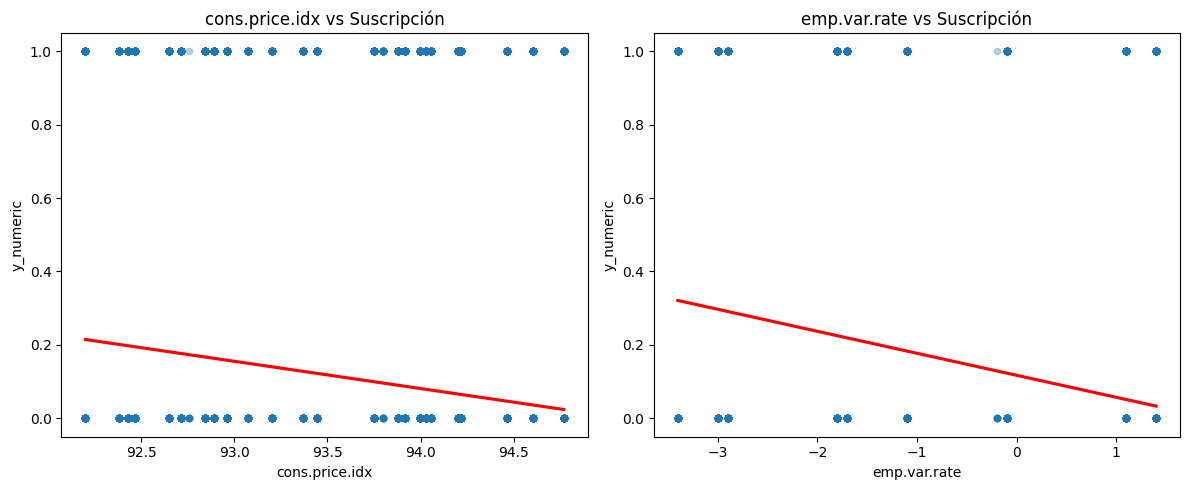

/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_98408/4289827930.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


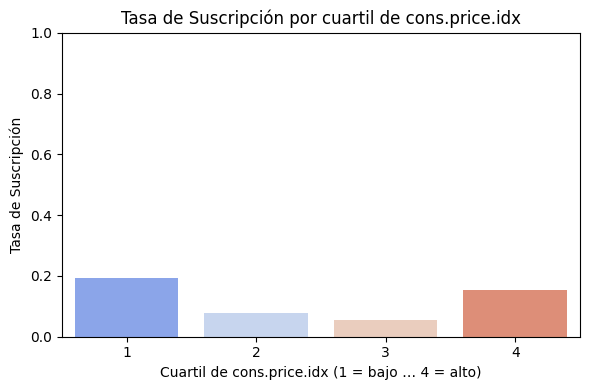

/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_98408/4289827930.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


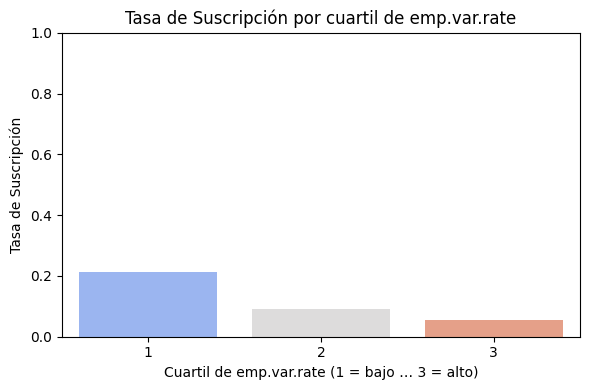

In [21]:
# 1) Correlaciones Pearson para las variables macroeconómicas
for var in ['cons.price.idx','emp.var.rate']:
    r, p = pearsonr(df[var], df['y_numeric'])
    print(f"Pearson r({var}, y) = {r:.3f}, p = {p:.3g}")

# 2) Scatter + regresión lineal
fig, axes = plt.subplots(1, 2, figsize=(12,5))
for ax, var in zip(axes, ['cons.price.idx','emp.var.rate']):
    sns.regplot(x=var, y='y_numeric',
                data=df,
                scatter_kws={'alpha':0.3,'s':20},
                line_kws={'color':'red'},
                ci=None,
                ax=ax)
    ax.set_ylim(-0.05,1.05)
    ax.set_title(f"{var} vs Suscripción")
plt.tight_layout()
plt.show()

# 3) Tasa de suscripción por cuartiles usando labels=False
for var in ['cons.price.idx','emp.var.rate']:
    # qcut sin etiquetas, 0..n_bins-1, luego +1 → 1..n_bins
    df[f'{var}_quartile'] = pd.qcut(
        df[var], 
        q=4, 
        labels=False, 
        duplicates='drop'
    ) + 1

    quartile_rate = (
        df
        .groupby(f'{var}_quartile')['y_numeric']
        .mean()
        .reset_index()
        .rename(columns={'y_numeric':'subscription_rate'})
    )

    plt.figure(figsize=(6,4))
    sns.barplot(
        x=f'{var}_quartile',
        y='subscription_rate',
        data=quartile_rate,
        palette='coolwarm'
    )
    plt.ylim(0,1)
    plt.xlabel(f'Cuartil de {var} (1 = bajo … {quartile_rate[f"{var}_quartile"].max()} = alto)')
    plt.ylabel('Tasa de Suscripción')
    plt.title(f'Tasa de Suscripción por cuartil de {var}')
    plt.tight_layout()
    plt.show()